In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

from models.migdal import Migdal
from detectors.sabre import SABRE
from veldists import VelDist
from constants import *

import multihist as mh
import pickle as pkl

import numericalunits as nu
import wimprates as wr

/Users/Robert/anaconda3/envs/flamedisx/lib/python3.11/site-packages/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are changed in accordance with https://arxiv.org/abs/2105.00599 (github.com/JelleAalbers/wimprates/pull/14)
  warnings.warn(


In [2]:
Det = SABRE()
Model = Migdal()
Dist = VelDist("avSHM", 0.3)

In [3]:
mass = 1. * GeV
ref_xsec = 1e-36

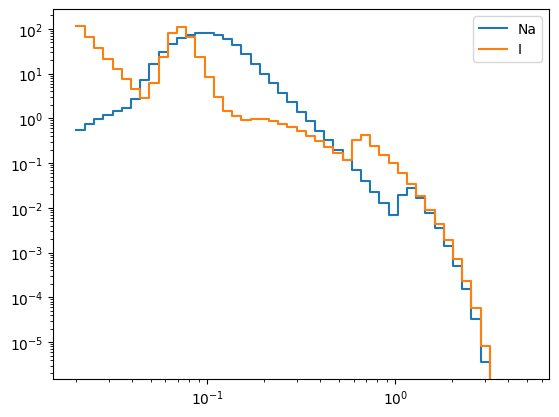

In [4]:
energy_edges = np.geomspace(0.02, 5)

rate_edges = np.array([Model.dRdER(Det.Nuclei()[0], e * keV, mX=mass, sig=ref_xsec, VelDist=Dist,
                                   SI=True) for e in energy_edges])
rate_centers = 0.5 * (rate_edges[1:] + rate_edges[:-1])
hist = mh.Histdd.from_histogram(histogram=rate_centers, bin_edges=[energy_edges])
hist.plot()

rate_edges = np.array([Model.dRdER(Det.Nuclei()[1], e * keV, mX=mass, sig=ref_xsec, VelDist=Dist,
                                   SI=True) for e in energy_edges])
rate_centers = 0.5 * (rate_edges[1:] + rate_edges[:-1])
hist = mh.Histdd.from_histogram(histogram=rate_centers, bin_edges=[energy_edges])
hist.plot()

plt.legend(['Na', 'I'])

plt.xscale('log')
plt.yscale('log')